# TD3: Discussion sur l'entropie
Auteur: Sacha Guerrini

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import scipy.special as sp
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Boltzmann constant (set to 1 for simplicity)
kB = 1.0

Le cours de physique statistique introduit une grandeur physique appelée l'entropie définie dans l'ensemble microcanonique avec la formule de Boltzmann:

$$
S(E) = k_B \log(\Omega(E))
$$

où $\Omega(E)$ est le nombre de micro-états accessibles avec l'énergie $E$ fixée.

L'entropie est une grandeur émergente dans des systèmes possédant un grand nombre de particules. Il n'y pas de limite absolue au nombre de particules et en pratique l'entropie peut toujours être calculée même avec un petit nombre de particules. Le but de ce notebook est de montrer cela avec les outils numériques.

## Un petit mot sur la différence entre statistiques et probabilités

Une chose à avoir en tête est qu'il ne faut pas confondre les concepts de la théorie des probabilités et des statistiques. Dans les deux cas, on manipule des variables aléatoires, des grandeurs dont l'issue est incertaine car générée par un processus stochastique (e.g. l'issue d'un pile ou face, le nombre de jours d'ensoleillement à Paris ou le nombre d'amas de galaxies formés au cours de l'histoire de l'Univers 🙂). Le but de la théorie des probabilités est de caractériser les lois suivies par ces variables aléatoires. Une liste non exhaustive des choses qui s'en rapportent est par exemple:
- décrire la zoologie des lois de probabilités envisageables
- caractériser leurs moments (moyenne, variance, etc...)
- décrire les lois suivies par des combinaisons de variables aléatoires (somme, produit, moyenne, ...)
- discuter les hypothèses attenantes à tous ces résultats (indépendance, existence des moments, ...)
- et bien d'autres choses que je vous laisse le plaisir de découvrir

La loi des grands nombres ou le théorème central limite sont deux résultats centraux de la théorie des probabilités qui donnent des résultats de convergence dans la limite d'un nombre de variables aléatoires indépendantes et identiquement distribuées infini et sont d'une importance cruciale pour construire la théorie des statistiques.

En effet, en statistique, on pose le problème à l'envers de la théorie des probabilités. Précédemment, on suppose connaitre la loi d'une variable aléatoire et on veut étudier ses propriétés. En statistique, on observe des données générées par un certain processus stochastique et on se demande "Quelle est la loi de probabilité suivie par ce processus?". Cette dernière question est centrale car c'est le coeur de la réussite des récentes technologies d'intelligence artificielle. En effet, quand une IA est entrainée à générer des visages, elle a appris ce qu'était la distribution de probabilité de la variable aléatoire "visage" en regardant des exemples de visages. Pour revenir à des choses simples, un premier problème que l'on peut poser est: étant donné un processus aléatoire, puis-je à partir d'échantillons correctement estimer la moyenne de ce processus aléatoire? La réponse dépend du nombre d'échantillons et la convergence est garantie théoriquement si le processus est échantilloné de façon indépendante et suit une loi de distribution pas trop méchante. Imaginons que l'on ne possède que deux échantillons d'une variable aléatoire gaussienne. Alors estimer la moyenne de la gaussienne à partir de la moyenne empirique des deux échantillons va donner un résultat très fluctuant. Si j'ai un grand nombre d'échantillons, l'estimation va converger d'après la loi des grands nombres et l'incertitude est donnée par le théorème central limite. Une illustration de cela a déjà été montrée dans le notebook du TD 1 sur l'exercice 6.

Pour résumer tout cela en deux lignes:
- Probabilité: on connait la loi et on veut calculer ses propriétés.
- Statistique: on possède des échantillons d'un processus aléatoire et on veut caractériser sa loi.

## Entropie

L'entropie, de la même façon que la moyenne ou la variance, caractérise une loi de probabilité $p$. Une façon de la voir mathématiquement est de regarder sa définition dans la *théorie de l'information*:

$$
H(X) = \mathbb{E}_{X \sim p(X)}\left[ -\log(p(X))\right]
$$

L'entropie est une moyenne d'information sur les états du système. De même que dans l'exemple précédent, son estimation dans le contexte d'un faible nombre d'échantillon ne converge pas et est dominée par des fluctuations. Cela justifie que l'entropie puisse être vue comme une propriété émergente lorsque le nombre d'échantillons augmente.

Dans le contexte du TD et du cours de physique statistique, cette discussion est cachée dans les notations et les formules établies dans le contexte des ensemble statistiques mais reste correcte. En effet, dans le cadre de l'ensemble microcanonique, on fait l'hypothèse que tous les microétats accessible sont équiprobables. L'entropie de Boltzmann se déduit donc directement de l'entropie de Shannon avec une loi de probabilité uniforme, à un facteur $k_B$ près. Pour un faible nombre de particule, l'entropie est donc dominée par les fluctuations.

## Modèle jouet



On propose ici un premier modèle jouet pour illustrer les concepts introduits ci-dessus. On considère une variable aléatoire suivant une loi de Bernoulli de paramètre $p=0.5$:

$$
X \sim \mathcal{B}(p)
$$

Dans le code ci-dessous, on simule $N$ échantillons suivant cette loi de Bernoulli pour estimer l'entropie et on fait varier $N$. On peut également calculer la valeur théorique de l'entropie à partir de la formule de l'entropie de Shannon.

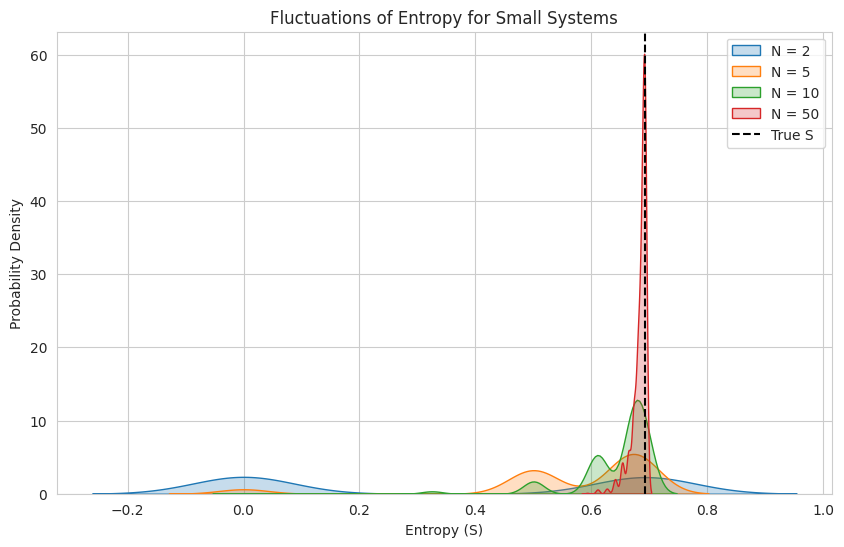

In [7]:
def compute_microstate_entropy(state, N):
    """
    Compute entropy for a given microstate where `state` is the number of particles in state '1'.
    """
    p1 = state / N  # Probability of state "1"
    p0 = 1 - p1  # Probability of state "0"

    # Entropy for this microstate (ignoring cases where p=0 to avoid log(0))
    entropy = -kB * (p1 * np.log(p1) if p1 > 0 else 0) - kB * (p0 * np.log(p0) if p0 > 0 else 0)
    return entropy

def simulate_entropy_fluctuations(N, trials=1000):
    """
    Simulate entropy fluctuations by generating `trials` different microstates for a given N.
    """
    entropy_values = []
    for _ in range(trials):
        # Generate a random number of particles in state "1" (binomially distributed)
        state = np.random.binomial(N, 0.5)
        entropy_values.append(compute_microstate_entropy(state, N))
    
    return entropy_values

# Choose small values of N to highlight fluctuations
N_values = [2, 5, 10, 50]  
trials = 1000  # Number of trials per N

# Plot entropy distributions
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

for N in N_values:
    entropies = simulate_entropy_fluctuations(N, trials)
    sns.kdeplot(entropies, fill=True, label=f"N = {N}")

#Compute tthe true entropy of the distribution
states = np.array([0, 1])  # Number of particles in state "1"
probabilities = stats.bernoulli.pmf(states, 0.5)  # Binomial distribution

# Compute entropy: S = -kB * sum(p * log(p)), ignoring p=0 cases
truth_entropy = -kB * np.sum(probabilities * np.log(probabilities, where=(probabilities > 0)))
plt.axvline(truth_entropy, color='k', linestyle='--', label=f"True S")

plt.xlabel("Entropy (S)")
plt.ylabel("Probability Density")
plt.title("Fluctuations of Entropy for Small Systems")
plt.legend()
plt.show()

Il apparait très clairement que pour un faible nombre de particule, l'entropie n'est pas bien définie et qu'elle converge avec le nombre d'échantillons vers la vraie valeur.